In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

df_full_user = pd.read_csv("../preprosscedDataSet.csv")
df_games = pd.read_csv("../full_api_preprocessing.csv")

In [5]:
df_full_user["user_id"].value_counts()

62990992     669
30246419     477
20772968     444
11403772     437
33865373     425
            ... 
278505070      1
278415486      1
278280460      1
278222242      1
307846753      1
Name: user_id, Length: 12285, dtype: int64

In [25]:
df_games.genre2 = df_games.genre2.combine_first(df_games.genre1)
df_games.genre3 = df_games.genre3.combine_first(df_games.genre2)

<AxesSubplot:>

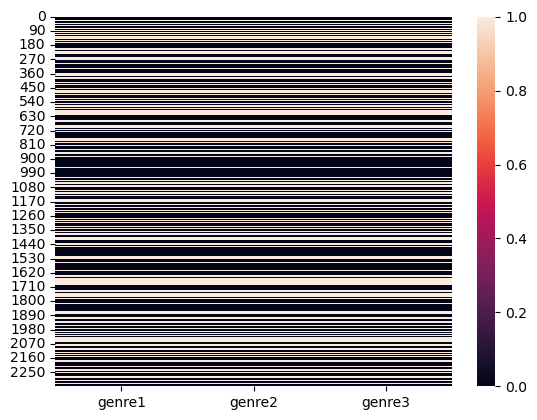

In [27]:
sns.heatmap(df_games[["genre1","genre2","genre3"]].isna())

In [52]:
col = []
genre_list = []

col.append("name")

for genre in df_games.genre1.value_counts().index.to_list():
    if not genre in genre_list :
        genre_list.append(genre)
        col.append(genre)
        
for genre in df_games.genre2.value_counts().index.to_list():
    if not genre in genre_list :
        genre_list.append(genre)
        col.append(genre)

for genre in df_games.genre3.value_counts().index.to_list():
    if not genre in genre_list :
        genre_list.append(genre)
        col.append(genre)



In [53]:
genre_list

['Shooter',
 'Role-playing (RPG)',
 'Simulator',
 'Platform',
 'Puzzle',
 'Real Time Strategy (RTS)',
 'Strategy',
 'Adventure',
 'Point-and-click',
 'Racing',
 'Fighting',
 'Music',
 'Sport',
 'Indie',
 "Hack and slash/Beat 'em up",
 'Turn-based strategy (TBS)',
 'Arcade',
 'Visual Novel',
 'Pinball',
 'Card & Board Game',
 'Tactical',
 'Quiz/Trivia',
 'MOBA']

In [47]:
df_genre = pd.DataFrame(columns=genre_list)

genre_rates = []

for game in df_games["01_game_name"]:
    game_rates = []
    for genre in genre_list:
        rate = 0
        if df_games[df_games["01_game_name"]==game]["genre1"].values[0] == genre :
            rate = rate + 1
        if df_games[df_games["01_game_name"]==game]["genre2"].values[0] == genre :
            rate = rate + 1
        if df_games[df_games["01_game_name"]==game]["genre3"].values[0] == genre :
            rate = rate + 1
        game_rates.append(rate)
    
    genre_rates.append(game_rates)      
         
genre_rates


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
df_genre

,Shooter,Role-playing (RPG),Simulator,Platform,Puzzle,Real Time Strategy (RTS),Strategy,Adventure,Point-and-click,Racing,...,Indie,Hack and slash/Beat 'em up,Turn-based strategy (TBS),Arcade,Visual Novel,Pinball,Card & Board Game,Tactical,Quiz/Trivia,MOBA


In [46]:
df_games[df_games["01_game_name"]==game]["genre1"].values[0]

'Real Time Strategy (RTS)'